# Automated Ideation with ChatGPT and Stable Diffusion

Copyright 2023, Denis Rothman

This notebook implements an educational example of automated ideation beyon human designed prompts.

The automation requires no human intervention. It's a click-and-run process.

The notebook automatically creates an instruction for ChatGPT which in turn creates prompts that Stable Diffusion transformers into images.


In [ ]:
#To access saved API keys
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Development access to delete when going into production
with open('drive/MyDrive/files/github.txt', 'r') as f:
    github_token = f.read().strip()

In [ ]:
#Development access to delete when going into production Notebook images/19
!curl -H 'Authorization: token {github_token}' -L https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/main/Notebook%20images/20/chatgpt_stable_diffusion.jpg --output "chatgpt_stable_diffusion.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 67008  100 67008    0     0   256k      0 --:--:-- --:--:-- --:--:--  257k


## Automated Ideation Process

1.**The context document** is prepared
2.**ChatGPT**, GPT-4, generates text-to-image prompts     
3.**Stable Diffusion** generates images from automated prompts.


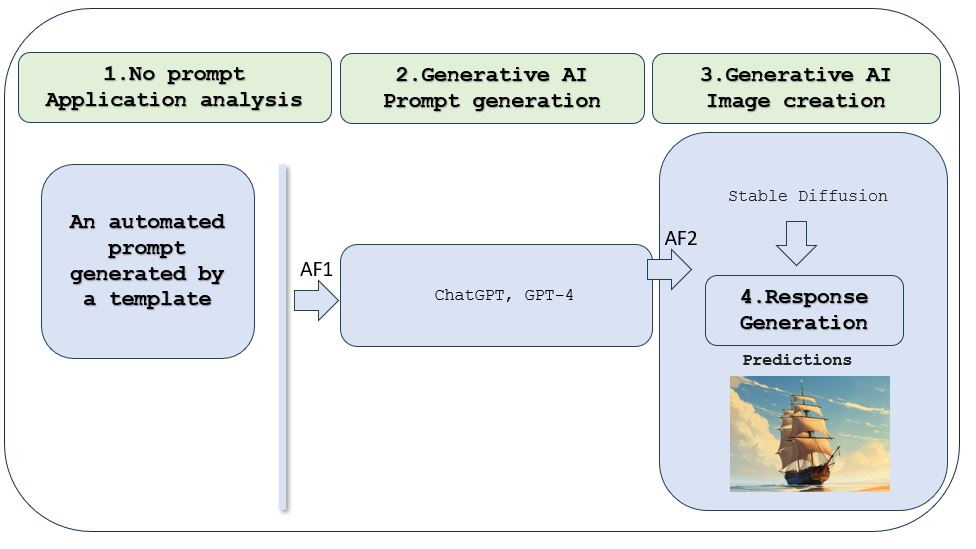

In [ ]:
# @title
from IPython.display import Image     #This is used for rendering images in the notebook
from PIL import Image
image_path = "/content/chatgpt_stable_diffusion.jpg"
image = Image.open(image_path)
image

Activate  a GPU to run this notebook for Stable Diffusion.

Then check that the GPU is activated with the following instruction.

In [ ]:
!nvidia-smi

Fri Aug 18 19:05:26 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1.Automated context preparation

## Retrieving context documents

The following context document could come from any source: emails, web, knowledge base, PDFs or any other source of information.

Classical administration tools can be used to store the documents.

The following code downloads a text to analyze it and automatically create prompts for Stable Diffusion.

In [ ]:
#Development access to delete when going into production Notebook images/19
!curl -H 'Authorization: token {github_token}' -L https://raw.githubusercontent.com/Denis2054/Transformers-for-NLP-and-Computer-Vision-3rd-Edition/main/Chapter20/ecodocument.txt --output "ecodocument.txt"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2130  100  2130    0     0   8387      0 --:--:-- --:--:-- --:--:--  8418


## Displaying a document for support

It is not necessary to display the document in production.
However, if there is a support request, it can be useful to check the input.

In [ ]:
# Read the content of the file
with open("ecodocument.txt", "r") as f:
    content = f.read()

# Display content in HTML format
from IPython.core.display import display, HTML

display(HTML(f"""
<html>
<head>
    <title>Sustainable Fashion</title>
    <style>
        body {{ font-family: Arial, sans-serif; }}
        h1 {{ color: #2E8B57; }}
        p {{ text-align: justify; }}
    </style>
</head>
<body>
    <h1>Why Sustainable Fashion is Our Secret Weapon Against Climate Change</h1>
    <p>{content}</p>
</body>
</html>
"""))


## Automated preparation of instruction for GPT-4

This is a "no prompt" situation in which no human intervention is required in the process.

In [ ]:
# Create a variable to store the text and add the content
input_text = "Summarize the following text in 5 lines from 1 to 5 that can be used as text-to-image prompts:" + content
print(input_text) # for support

Summarize the following text in 5 lines from 1 to 5 that can be used as text-to-image prompts:Why Sustainable Fashion is Our Secret Weapon Against Climate Change
Imagine a world where every clothing choice you make becomes a statement, not just of style, but of stewardship for our planet. Sounds empowering, right? That’s because sustainable fashion isn’t just a trend; it’s a revolution. And it’s one of the most potent tools we have to combat climate change.
Fashion’s Carbon Footprint : The global fashion industry accounts for about 10% of carbon emissions, more than all international flights and maritime shipping combined. Each time you select a sustainably produced garment, you’re slashing that carbon footprint.
Water Conservation : The traditional fashion industry consumes a staggering amount of water – it can take up to 2,700 liters of water to make a single cotton t-shirt! Choosing eco-friendly materials and methods can conserve our precious water resources.
Waste Reduction : Every

## Defining the dialog function (static)

In [ ]:
 def dialog(uinput):
   #preparing the prompt for OpenAI
   role="user"

   line = {"role": role, "content": uinput}

   #creating the message
   assert1={"role": "system", "content": "You summarize a text in engaging lines that will be used as prompts"}
   assert2={"role": "assistant", "content": "Summarize the best ideas of a text in short lines from 1 to n"}
   assert3=line
   iprompt = []
   iprompt.append(assert1)
   iprompt.append(assert2)
   iprompt.append(assert3)

   #sending the message to ChatGPT
   response=client.chat.completions.create(model="gpt-4",messages=iprompt) #ChatGPT dialog
   text=response.choices[0].message.content #property of the response in dot notation

   return text

# 2.Automated Ideation with GPT-4
.




**Installing OpeanAI and Costs:**    
This notebook uses billable components of [OpenAI](https://openai.com/) for ChatGPT, GPT-4.

In [ ]:
#Importing openai
try:
  import openai
  from openai import OpenAI
except:
  !pip install openai
  import openai
  from openai import OpenAI

In [ ]:
#The OpenAI Key
f = open("drive/MyDrive/files/api_key.txt", "r")
API_KEY=f.readline()
f.close()

import os
os.environ['OPENAI_API_KEY'] =API_KEY
openai.api_key = os.getenv("OPENAI_API_KEY")

## Ideation

## generate text-to-image prompts

In [ ]:
uinput=input_text
text=dialog(uinput) #preparing the messages for ChatGPT and making the request

In [ ]:
text

'1. "Harnessing the sustainable fashion revolution to combat climate change, one garment at a time."\n2. "Slashing the hefty carbon footprint of the fashion industry by choosing sustainably produced items."\n3. "Preserving water, reducing waste, and transforming yesterday’s costumes into today\'s trends through eco-fashion methods."\n4. "Standing guard for the planet\'s biodiversity and ecosystems by advocating ethical and sustainable fashion."\n5. "Matching style with substance: empowering global communities with every ethical fashion choice made."'

### Prompt output processing

Processing and saving the outputs for the text-to-image generation

In [ ]:
# Splitting the string by \n to get a list of sentences
sentences = text.split("\n")

# Splitting the string by \n to get a list of sentences
sentences = [s.strip() for s in text.split("\n") if s]

# Removing the index and extra quotes from each sentence
cleaned_sentences = []
for sentence in sentences:
    parts = sentence.split('. "')
    if len(parts) > 1:
        cleaned_sentences.append(parts[1][:-1])

# Writing the cleaned sentences to the file "image2text.txt"
with open("image2text.txt", "w") as file:
    for sentence in cleaned_sentences:
        file.write(sentence + '\n')

Support code to view the content if there is an issue

In [ ]:
with open("image2text.txt", "r") as file:
    content = file.read()
    print(content)

Harnessing the sustainable fashion revolution to combat climate change, one garment at a time.
Slashing the hefty carbon footprint of the fashion industry by choosing sustainably produced items.
Preserving water, reducing waste, and transforming yesterday’s costumes into today's trends through eco-fashion methods.
Standing guard for the planet's biodiversity and ecosystems by advocating ethical and sustainable fashion.
Matching style with substance: empowering global communities with every ethical fashion choice made.



The following code is for Google Drive usage for a project. You can save the prompts for further use without running the Ideation again.

In [ ]:
!cp image2text.txt  "drive/MyDrive/files/image2text.txt"

# 3.Image Creation with Stable Diffusion

Next, you should install `diffusers` as well `scipy`, `ftfy` and `transformers`. `accelerate` is used to achieve much faster loading.

In [ ]:
!pip install diffusers==0.11.1 -qq
!pip install transformers scipy ftfy accelerate -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.2 MB/s eta 0:00:00


## Stable Diffusion Pipeline

`StableDiffusionPipeline` is an end-to-end inference pipeline that you can use to generate images from text with just a few lines of code.


In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

safety_checker/pytorch_model.fp16.safetensors not found


Fetching 28 files:   0%|          | 0/28 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Moving the pipeline to GPU to have faster inference.

In [ ]:
pipe = pipe.to("cuda")

## Retrieving the ideation outputs

Retrieving Ideation prompts inferred by Google Vertex AI PaLM 2 for text2image prompt creation

The following code is for Google Drive usage for a project

In [ ]:
!cp "drive/MyDrive/files/image2text.txt" image2text.txt

## Create a text-to-image function

In [ ]:
def text2image(prompt):
  image=pipe(prompt).images[0]
  return image

## Generating images



In [ ]:
from IPython.display import Image, display

# Path of the Ideation file containing text prompts
with open("image2text.txt", "r") as f:
    lines = f.readlines()
    line_count = len(lines)
    print("Number of lines", line_count)

Number of lines 5


  0%|          | 0/50 [00:00<?, ?it/s]

Harnessing the sustainable fashion revolution to combat climate change, one garment at a time.


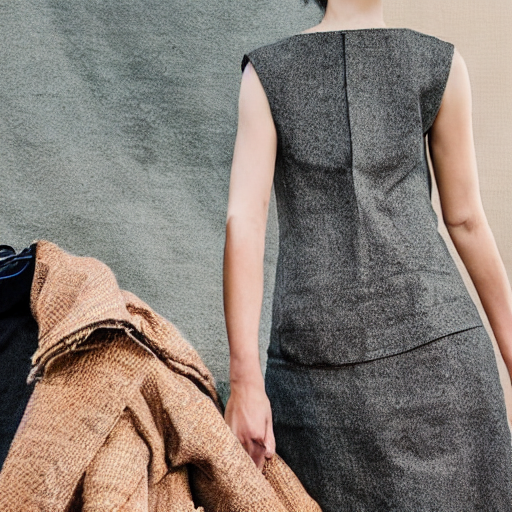

  0%|          | 0/50 [00:00<?, ?it/s]

Slashing the hefty carbon footprint of the fashion industry by choosing sustainably produced items.


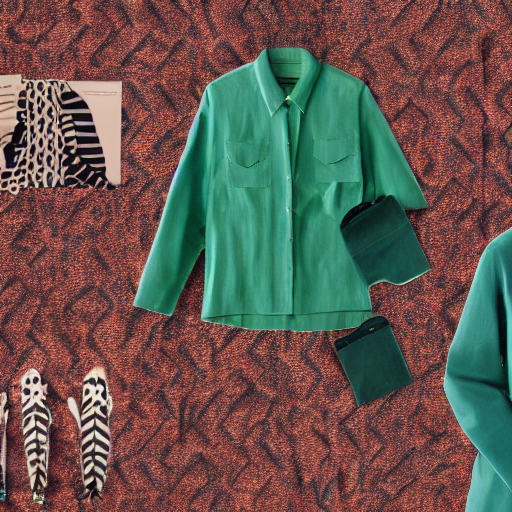

  0%|          | 0/50 [00:00<?, ?it/s]

Preserving water, reducing waste, and transforming yesterday’s costumes into today's trends through eco-fashion methods.


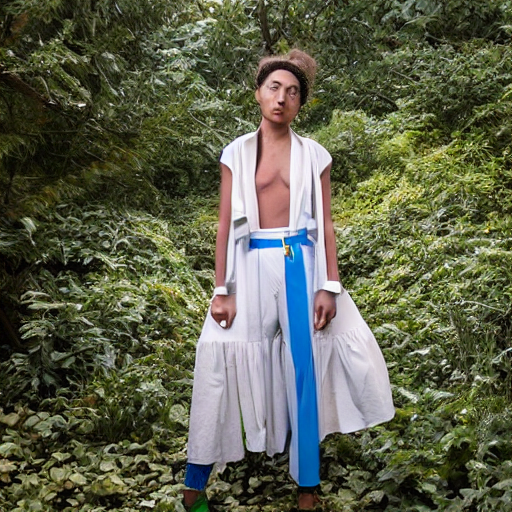

  0%|          | 0/50 [00:00<?, ?it/s]

Standing guard for the planet's biodiversity and ecosystems by advocating ethical and sustainable fashion.


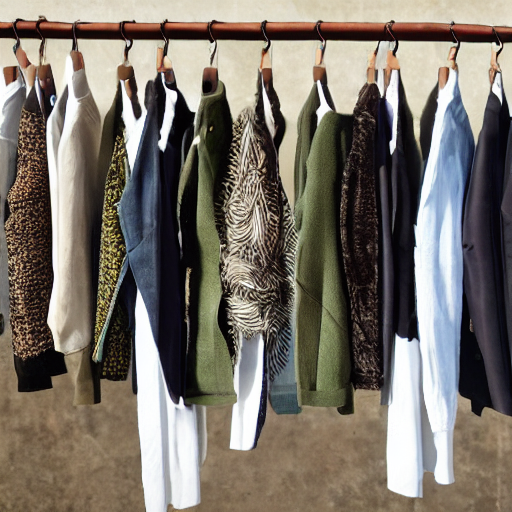

  0%|          | 0/50 [00:00<?, ?it/s]

Matching style with substance: empowering global communities with every ethical fashion choice made.


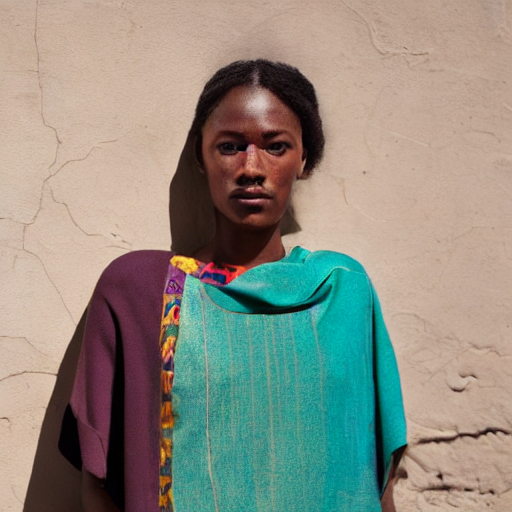

number of images 5


In [ ]:
import re
i=0
for line in lines:
    prompt = line.strip()
    prompt = re.sub(r"\d+\. ", "", prompt)
    Image = text2image(prompt)
    i+=1
    print(prompt)
    display(Image)

print("number of images", i)